In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
day = pd.read_csv("day.csv")

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day.shape

(730, 16)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
day.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
day['season'].replace({1:'spring',2:'summer', 3:'fall', 4:'winter'}, inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
day['weathersit'].replace({1:'Clear',2:'Mist+Cloudy', 3:'Light Snow', 4:'Heavy Rain+Ice Pellets'}, inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
day['mnth'].replace({1:'January',2:'February', 3:'March', 4:'April', 5:'May', 6: 'June', 7: 'July', 8:'August', 9:'September',10:'October',11:'November',12:'December'}, inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,1,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,2,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
day['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6: 'Saturday', 7: 'Sunday'}, inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


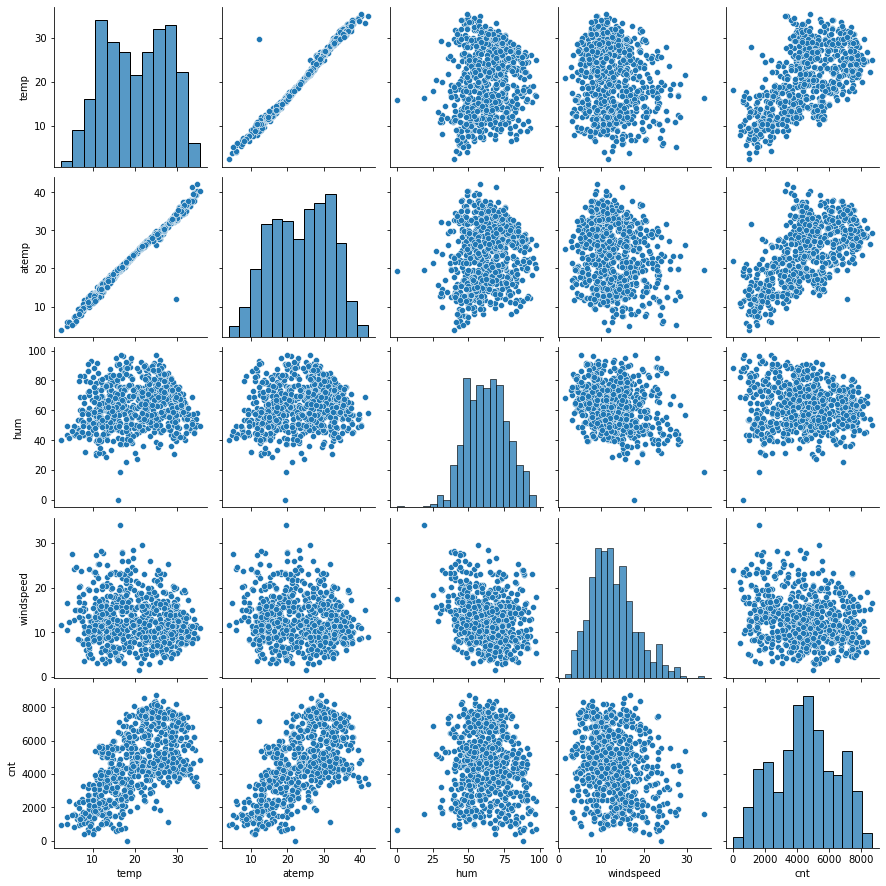

In [13]:
sns.pairplot(day, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

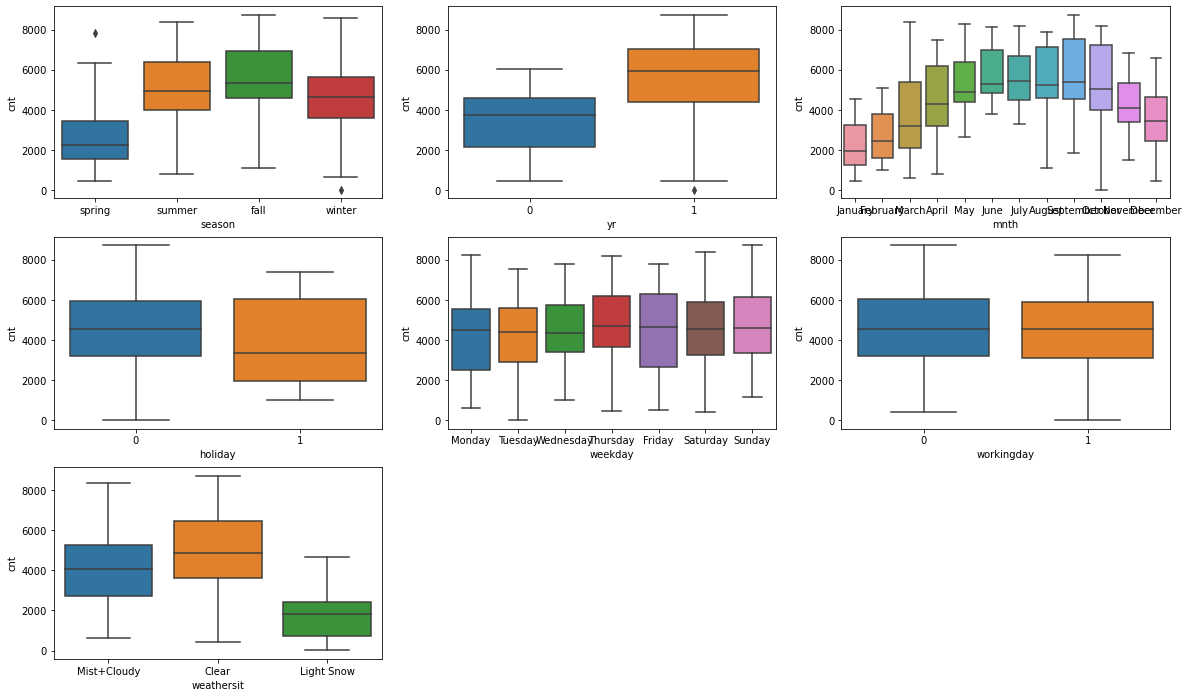

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

In [15]:
status1 = pd.get_dummies(day['season'])
status1.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [16]:
# dropped fall
status1 = pd.get_dummies(day['season'], drop_first = True)
status1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
day = pd.concat([day, status1], axis = 1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,January,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,January,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [18]:
status2 = pd.get_dummies(day['mnth'])
status2.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
# dropped April
status2 = pd.get_dummies(day['mnth'], drop_first = True)
status2.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
day = pd.concat([day, status2], axis = 1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,December,February,January,July,June,March,May,November,October,September
0,spring,0,January,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,January,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [21]:
status3 = pd.get_dummies(day['weekday'])
status3.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [22]:
# dropped Friday
status3 = pd.get_dummies(day['weekday'], drop_first = True)
status3.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [23]:
day = pd.concat([day, status3], axis = 1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,January,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,January,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [24]:
status4 = pd.get_dummies(day['weathersit'])
status4.head()

,Clear,Light Snow,Mist+Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
# dropped Clear
status4 = pd.get_dummies(day['weathersit'], drop_first = True)
status4.head()

,Light Snow,Mist+Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [26]:
day = pd.concat([day, status4], axis = 1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist+Cloudy
0,spring,0,January,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [27]:
day.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [28]:
day.shape

(730, 30)

In [29]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist+Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist+Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


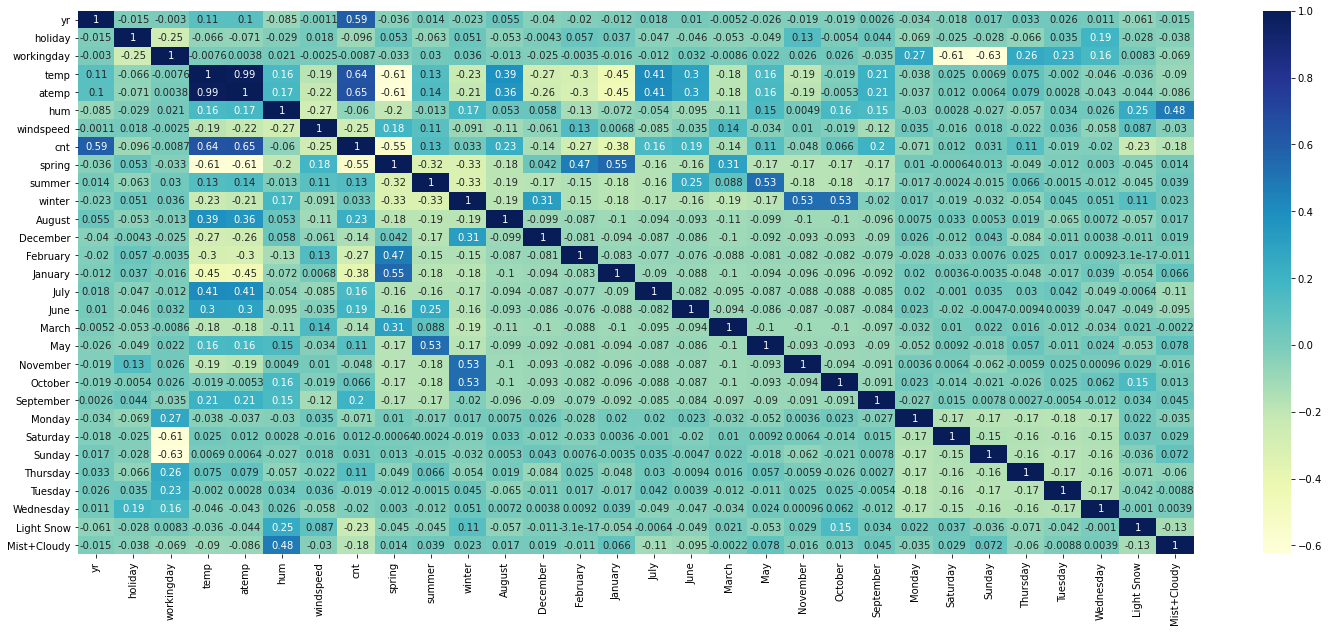

In [37]:
plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [40]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist+Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [41]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          0.394765
yr             0.230933
holiday       -0.135245
workingday    -0.060878
temp           0.400268
atemp          0.046419
hum           -0.157757
windspeed     -0.181137
spring        -0.044097
summer         0.041756
winter         0.110482
August         0.023034
December      -0.045685
February      -0.037177
January       -0.063451
July          -0.033912
June           0.002144
March          0.000805
May            0.024765
November      -0.041530
October        0.005922
September      0.086720
Monday        -0.024668
Saturday      -0.056309
Sunday        -0.050307
Thursday       0.003841
Tuesday       -0.026341
Wednesday     -0.011247
Light Snow    -0.250902
Mist+Cloudy   -0.059311
dtype: float64

In [42]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          4.09e-178
Time:                        18:46:44   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3948      0.085      4.638      

In [43]:
# High p-value - March (0.974), June(0.933), Oct (0.870),Thursday (0.798),atemp(0.739), august(0.503),sunday(0.482),
# wednesday (0.462),saturday(0.432),july (0.341),working day(0.392), Feb (0.265), May (0.259), Nov(0.259),dec (0.178), 
# spring (0.146),summer (0.116), holiday (0.039), Jan (0.062),Wed (0.074),Sept (0.008) 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,442.82
4,atemp,382.51
2,workingday,63.90
5,hum,41.21
7,spring,13.56
9,winter,12.53
23,Sunday,12.35
22,Saturday,11.84
8,summer,9.87
18,November,7.16


In [46]:
X = X_train.drop(['atemp','workingday', 'spring', 'Saturday', 'Sunday', 'summer', 'November', 'August', 'October', 'January', 'July', 'December', 'September'], 1,)
X.head()

,yr,holiday,temp,hum,windspeed,winter,February,June,March,May,Monday,Thursday,Tuesday,Wednesday,Light Snow,Mist+Cloudy
653,1,0,0.509887,0.575354,0.300794,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,1


In [70]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const          0.236742
yr             0.230079
holiday       -0.086166
temp           0.586348
hum           -0.154824
windspeed     -0.170422
winter         0.121134
February      -0.030444
June           0.011554
March          0.019873
May            0.064540
Monday        -0.027681
Thursday       0.004980
Tuesday       -0.029738
Wednesday     -0.011246
Light Snow    -0.234131
Mist+Cloudy   -0.050385
dtype: float64

In [48]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     136.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          2.14e-169
Time:                        18:46:44   Log-Likelihood:                 469.99
No. Observations:                 510   AIC:                            -906.0
Df Residuals:                     493   BIC:                            -834.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2367      0.031      7.725      

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.91
2,temp,9.59
4,windspeed,3.83
15,Mist+Cloudy,2.17
0,yr,2.04
5,winter,1.80
12,Tuesday,1.40
10,Monday,1.37
11,Thursday,1.37
13,Wednesday,1.37


In [50]:
X1 = X.drop('hum',1)
X1.head()

,yr,holiday,temp,windspeed,winter,February,June,March,May,Monday,Thursday,Tuesday,Wednesday,Light Snow,Mist+Cloudy
653,1,0,0.509887,0.300794,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,0,0,0,0,0,1


In [51]:
X_train_lm = sm.add_constant(X1)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const          0.149143
yr             0.233503
holiday       -0.086923
temp           0.564440
windspeed     -0.140834
winter         0.113318
February      -0.029759
June           0.017727
March          0.020832
May            0.056576
Monday        -0.028446
Thursday       0.005221
Tuesday       -0.033569
Wednesday     -0.012561
Light Snow    -0.276801
Mist+Cloudy   -0.074904
dtype: float64

In [52]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     140.9
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.80e-167
Time:                        18:46:44   Log-Likelihood:                 462.78
No. Observations:                 510   AIC:                            -893.6
Df Residuals:                     494   BIC:                            -825.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1491      0.020      7.392      

In [53]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
3,windspeed,3.62
0,yr,2.03
14,Mist+Cloudy,1.49
4,winter,1.46
11,Tuesday,1.36
10,Thursday,1.35
9,Monday,1.33
12,Wednesday,1.33
6,June,1.26


In [54]:
X2 = X1.drop(['Thursday', 'June', 'February', 'March','Wednesday','Monday', 'Tuesday'] ,1)
X2.head()

,yr,holiday,temp,windspeed,winter,May,Light Snow,Mist+Cloudy
653,1,0,0.509887,0.300794,1,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1
728,1,0,0.245101,0.663106,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,1


In [55]:
X_train_lm = sm.add_constant(X2)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const          0.134919
yr             0.233222
holiday       -0.095537
temp           0.577329
windspeed     -0.143410
winter         0.110427
May            0.054744
Light Snow    -0.275026
Mist+Cloudy   -0.074330
dtype: float64

In [56]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          6.54e-172
Time:                        18:46:44   Log-Likelihood:                 454.16
No. Observations:                 510   AIC:                            -890.3
Df Residuals:                     501   BIC:                            -852.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1349      0.018      7.513      

In [57]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.33
3,windspeed,2.90
0,yr,2.00
7,Mist+Cloudy,1.47
4,winter,1.29
5,May,1.16
6,Light Snow,1.08
1,holiday,1.03


In [58]:
y_train_day = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

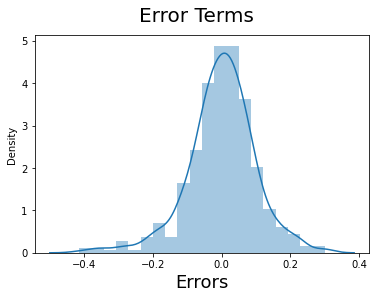

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_day), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

In [60]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
X_test_s = sm.add_constant(X_test)

In [63]:
X_test_s = X_test_s.drop(['Thursday', 'June', 'February', 'March','Wednesday','Monday', 'Tuesday','hum','atemp','workingday', 'spring', 'Saturday', 'Sunday', 'summer', 'November', 'August', 'October', 'January', 'July', 'December', 'September' ], axis = 1)

In [64]:
X_test_s.head()

,const,yr,holiday,temp,windspeed,winter,May,Light Snow,Mist+Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0
299,1.0,0,0,0.511964,0.334206,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0


In [65]:
y_pred_s = lr_4.predict(X_test_s)

Text(0, 0.5, 'y_pred')

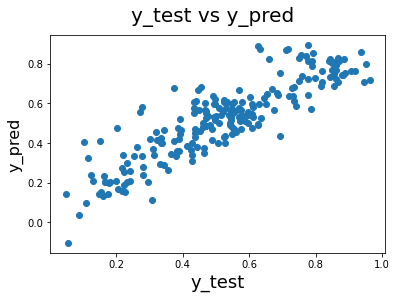

In [66]:
fig = plt.figure()
plt.scatter(y_test, y_pred_s)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'Residual')

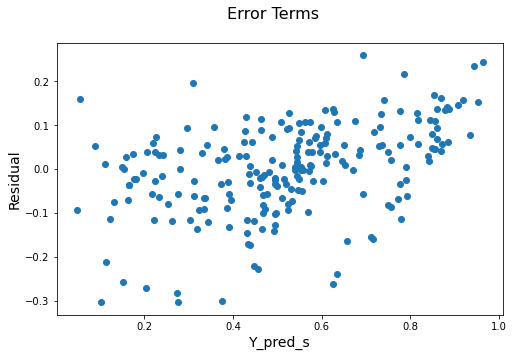

In [67]:
res_test = y_test - y_pred_s
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)               
plt.xlabel('Y_pred_s', fontsize=14)                   
plt.ylabel('Residual', fontsize=14)   

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_s)

0.7730925476046475

In [69]:
## Linear Equation
## cnt=0.1349+0.2332(yr)-0.0955(holiday)+0.5773(temp)-0.1434(windspeed)+0.1104(winter)+0.0547(May)-0.2750(Light Snow)-0.0743(Mist+Cloudy)